In [4]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,classification_report
import re
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

In [3]:
!pip show tensorflow


Name: tensorflow
Version: 2.3.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\dell\anaconda3\envs\new_en\lib\site-packages
Requires: grpcio, gast, six, scipy, protobuf, tensorboard, wrapt, wheel, astunparse, keras-preprocessing, google-pasta, absl-py, h5py, termcolor, tensorflow-estimator, numpy, opt-einsum
Required-by: 


In [5]:
dat = pd.read_csv('C:/Users/DELL/Desktop/4 dataset/restaurant1.csv',error_bad_lines=False , encoding='utf-8')

dat

,sentence,polarity,category,aspect
0,نموت علي اكل تونسي محرحر,Positive,FOOD#QUALITY,اكل
1,شعب هريسه اثبت وجود,Positive,GENERAL,NaN
2,انا فلسطي بفتخر انو تونس عرب مثلي تحيه لبلد را...,Positive,GENERAL,NaN
3,والله اطيب واذكي شعب ومضياف وشعب راقي تونس بوا...,Positive,GENERAL,NaN
4,والله هذا شاب تونسي رجال وكريم وطيب و ابن ناس ...,Positive,GENERAL,NaN
...,...,...,...,...
4224,مضر,Negative,RESTAURANT#cleanliness,نظافة
4225,ياسر مسخ,Negative,RESTAURANT#cleanliness,نظافة
4226,ملا تبلبيز,Negative,RESTAURANT#cleanliness,نظافة
4227,بنينه برشا و نظيفه انظف من محل عصريه نظيفه من ...,Positive,FOOD#QUALITY,اكل


In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd
train, test = train_test_split (dat, test_size= 0.20)
train.to_csv('train1.csv', index="true")
test.to_csv('test1.csv', index="true")

In [4]:
d1 = pd.read_csv('train1.csv', encoding='utf-8')

d1

,Unnamed: 0,sentence,polarity,category,aspect
0,1116,محمد عبو يشبه رئيس مصري راحل انور ساد,Positive,PRESIDENT,['رئيس']
1,3299,فصيح,Neutre,GENERAL,[]
2,8126,هذا الرجل ليس له أي فلسفة و سياسة للحكم هذا ال...,Negative,PRESIDENT,['رئيس']
3,1526,مبروك الى تونس على هذا عرس ديمقراطي,Neutre,GENERAL,[]
4,3026,لست مقتنعا برنامجه لكني سانتخبه,Negative,PROGRAM,['برنامج']
...,...,...,...,...,...
6542,4684,وهو يستهزي سواح جزائر,Negative,GENERAL,[]
6543,7041,راني اتفرج بداية مناظرة اظن بدا متناظر يتفاعل ...,Negative,DEBATE,['مناظره']
6544,712,اسئلة كلها تعجيزية وظاهر الي كان منشط مجهز روح...,Negative,DIALOGUE,['حوار']
6545,4493,حاجة الي تفرح الي سيف مكشخ,Neutre,GENERAL,[]


In [7]:
d1.polarity.value_counts().plot.bar()
d1.polarity.value_counts()

NameError: name 'd1' is not defined

Neutre      929
Positive    507
Negative    201
Name: polarity, dtype: int64

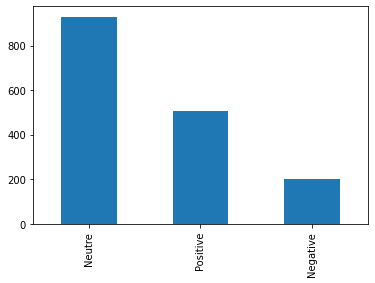

In [6]:
t1 = pd.read_csv('test1.csv', encoding='utf-8')

t1.polarity.value_counts().plot.bar()
t1.polarity.value_counts()

In [4]:
dat = pd.read_csv('C:/Users/DELL/Desktop/memoire de master/Dataset_memoire/restaurant1.csv',error_bad_lines=False , encoding='utf-8')

dat

,sentence,category,polarity,aspect
0,نموت علي اكل تونسي محرحر,FOOD#QUALITY,Positive,اكل
1,شعب هريسه اثبت وجود,GENERAL,Positive,"شعب,اكل"
2,انا فلسطيني بفتخر انو تونس عرب مثلي تحيه لبلد ...,GENERAL,Positive,NaN
3,والله اطيب واذكي شعب ومضياف وشعب راقي تونس بوا...,GENERAL,Positive,شعب
4,والله هذا شاب تونسي رجال وكريم وطيب و ابن ناس...,GENERAL,Positive,شاف
...,...,...,...,...
4224,مضر,RESTAURANT#cleanliness,Negative,اكل
4225,ياسر مسخ,RESTAURANT#cleanliness,Negative,مطعم
4226,ملا تبلبيز,RESTAURANT#cleanliness,Negative,اكل
4227,بنينه برشا و نظيفه انظف من محل عصريه نظيفه من ...,FOOD#QUALITY,Positive,"اكل,نظافة,عنوان,نظافة,نظافة"


In [6]:
dat.loc[dat.category == 'GENERAL', 'polarity'] = "Neutre"

dat

,sentence,polarity,category,aspect
0,نموت علي اكل تونسي محرحر,Positive,FOOD#QUALITY,اكل
1,شعب هريسه اثبت وجود,Neutre,GENERAL,NaN
2,انا فلسطي بفتخر انو تونس عرب مثلي تحيه لبلد را...,Neutre,GENERAL,NaN
3,والله اطيب واذكي شعب ومضياف وشعب راقي تونس بوا...,Neutre,GENERAL,NaN
4,والله هذا شاب تونسي رجال وكريم وطيب و ابن ناس ...,Neutre,GENERAL,NaN
...,...,...,...,...
4224,مضر,Negative,RESTAURANT#cleanliness,نظافة
4225,ياسر مسخ,Negative,RESTAURANT#cleanliness,نظافة
4226,ملا تبلبيز,Negative,RESTAURANT#cleanliness,نظافة
4227,بنينه برشا و نظيفه انظف من محل عصريه نظيفه من ...,Positive,FOOD#QUALITY,اكل


In [9]:
X= dat[(dat.category == 'RESTAURANT#cleanliness')&(dat.polarity== 'Positive')]
X


,sentence,polarity,category,aspect
712,اكثر حاجه عجبت فيه هي نظافه ما شاء الله,Positive,RESTAURANT#cleanliness,نظافة
725,انا نساند لعباد تبتكر ماكله واحد يزو بلاش صحن ...,Positive,RESTAURANT#cleanliness,نظافة
745,الله يبارك خدمه باهيه الله يعونك خويا بصح صوت ...,Positive,RESTAURANT#cleanliness,نظافة
811,ربي يباركلك نظافه و بنه ربي يعين رجال,Positive,RESTAURANT#cleanliness,نظافة
939,نظافه و يبان بنين عسل,Positive,RESTAURANT#cleanliness,نظافة
...,...,...,...,...
4043,قمه في تحيل علي حريف 30 د جرد سندويش ملبز في ف...,Positive,RESTAURANT#cleanliness,نظافة
4136,معنا تهتمو جبنه اما نظافه لا كيفاه الي يقطع عل...,Positive,RESTAURANT#cleanliness,نظافة
4207,انا عجبتي مشاء الله كل شي نظيف واستعمالك قفاز ...,Positive,RESTAURANT#cleanliness,نظافة
4208,يعطي صحه تجديد حلو ومزي وافكار حلوه فقط لو ممك...,Positive,RESTAURANT#cleanliness,نظافة


In [10]:
 
# Keeping only the neccessary columns
data = dat[['sentence','polarity']]

In [11]:
data.head()

,sentence,polarity
0,نموت علي اكل تونسي محرحر,Positive
1,شعب هريسه اثبت وجود,Neutre
2,انا فلسطي بفتخر انو تونس عرب مثلي تحيه لبلد را...,Neutre
3,والله اطيب واذكي شعب ومضياف وشعب راقي تونس بوا...,Neutre
4,والله هذا شاب تونسي رجال وكريم وطيب و ابن ناس ...,Neutre


Neutre      1634
Positive    1521
Negative    1074
Name: polarity, dtype: int64

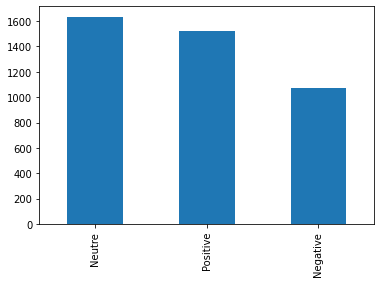

In [12]:
dat.polarity.value_counts().plot.bar()
dat.polarity.value_counts()

In [13]:

print(data[ data['polarity'] == 'Positive'].size)
print(data[ data['polarity'] == 'Negative'].size)
print(data[ data['polarity'] == 'Neutre'].size)

for idx,row in data.iterrows():
    row[0] = row[0].replace('rt','')
data.head()

3042
2148
3268


,sentence,polarity
0,نموت علي اكل تونسي محرحر,Positive
1,شعب هريسه اثبت وجود,Neutre
2,انا فلسطي بفتخر انو تونس عرب مثلي تحيه لبلد را...,Neutre
3,والله اطيب واذكي شعب ومضياف وشعب راقي تونس بوا...,Neutre
4,والله هذا شاب تونسي رجال وكريم وطيب و ابن ناس ...,Neutre


In [14]:

max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
a=tokenizer.fit_on_texts(dat['sentence'].values)
X = tokenizer.texts_to_sequences(dat['sentence'].values)
X = pad_sequences(X)
X[:2]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [41]:
# saving sentiments encoder
import pickle
with open('tokenizer1.pickle', 'wb') as handle:
    pickle.dump(dat['sentence'], handle, protocol=pickle.HIGHEST_PROTOCOL)

In [15]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 210, 128)          256000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 210, 128)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 196)               254800    
_________________________________________________________________
dense (Dense)                (None, 3)                 591       
Total params: 511,391
Trainable params: 511,391
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
Y = pd.get_dummies(dat['polarity']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)


print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(3383, 210) (3383, 3)
(846, 210) (846, 3)


In [17]:
Y = pd.get_dummies(dat['polarity']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)


print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(3383, 210) (3383, 3)
(846, 210) (846, 3)


In [18]:

batch_size = 128
model.fit(X_train, Y_train, epochs = 10, batch_size=batch_size, verbose = 1)

Epoch 1/10
27/27 [==============================] - 299s 11s/step - loss: 1.0738 - accuracy: 0.4357
Epoch 2/10
27/27 [==============================] - 335s 12s/step - loss: 0.9450 - accuracy: 0.5412
Epoch 3/10
27/27 [==============================] - 295s 11s/step - loss: 0.7626 - accuracy: 0.6852
Epoch 4/10
27/27 [==============================] - 282s 10s/step - loss: 0.6190 - accuracy: 0.7517
Epoch 5/10
27/27 [==============================] - 283s 10s/step - loss: 0.5112 - accuracy: 0.7904
Epoch 6/10
27/27 [==============================] - 348s 13s/step - loss: 0.4426 - accuracy: 0.8232
Epoch 7/10
27/27 [==============================] - 290s 11s/step - loss: 0.3923 - accuracy: 0.8537
Epoch 8/10
27/27 [==============================] - 275s 10s/step - loss: 0.3638 - accuracy: 0.8605
Epoch 9/10
27/27 [==============================] - 278s 10s/step - loss: 0.3334 - accuracy: 0.8702
Epoch 10/10
27/27 [==============================] - 274s 10s/step - loss: 0.2967 - accuracy: 0.8862

In [21]:
from sklearn.metrics import accuracy_score,f1_score
prediction = model.predict(X_test)
y_pred = (prediction > 0.5)
print("Accuracy of the model : ", accuracy_score(y_pred, Y_test))
print('F1-score: ', f1_score(y_pred, Y_test))
print('Confusion matrix:')
confusion_matrix(Y_test,y_pred)

Accuracy of the model :  0.6205673758865248


ValueError: Target is multilabel-indicator but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted', 'samples'].

In [26]:
Y_pred = model.predict_classes(X_test,batch_size = 128)
df_test = pd.DataFrame({'true': Y_test.tolist(), 'pred':Y_pred})
df_test['true'] = df_test['true'].apply(lambda x: np.argmax(x))
print("confusion matrix",confusion_matrix(df_test.true, df_test.pred))
print(classification_report(df_test.true, df_test.pred))
print("Accuracy of the model : ", accuracy_score(df_test.true, df_test.pred))
print("F1-score: ", f1_score(df_test.true, df_test.pred, average='micro'))

confusion matrix [[125  33  55]
 [ 43 245  59]
 [ 54  66 166]]
              precision    recall  f1-score   support

           0       0.56      0.59      0.57       213
           1       0.71      0.71      0.71       347
           2       0.59      0.58      0.59       286

    accuracy                           0.63       846
   macro avg       0.62      0.62      0.62       846
weighted avg       0.63      0.63      0.63       846

Accuracy of the model :  0.6335697399527187
F1-score:  0.6335697399527187


In [ ]:

batch_size = 128
model.fit(X_train, Y_train, epochs =20 , batch_size=batch_size, verbose = 1)


Epoch 1/20


In [15]:
model.save("sentiment_resto.h5")

In [11]:
# define the checkpoint
from tensorflow.keras.callbacks import ModelCheckpoint

filepath = "sent.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

# fit the model
model.fit(X_train, Y_train, epochs=10, batch_size=128, callbacks=callbacks_list)


Epoch 1/10
27/27 [==============================] - ETA: 0s - loss: 1.0721 - accuracy: 0.4233 
Epoch 00001: loss improved from inf to 1.07214, saving model to sent.h5
27/27 [==============================] - 445s 16s/step - loss: 1.0721 - accuracy: 0.4233
Epoch 2/10
27/27 [==============================] - ETA: 0s - loss: 0.9541 - accuracy: 0.5430 
Epoch 00002: loss improved from 1.07214 to 0.95406, saving model to sent.h5
27/27 [==============================] - 436s 16s/step - loss: 0.9541 - accuracy: 0.5430
Epoch 3/10
27/27 [==============================] - ETA: 0s - loss: 0.7559 - accuracy: 0.6884 
Epoch 00003: loss improved from 0.95406 to 0.75594, saving model to sent.h5
27/27 [==============================] - 394s 15s/step - loss: 0.7559 - accuracy: 0.6884
Epoch 4/10
27/27 [==============================] - ETA: 0s - loss: 0.6196 - accuracy: 0.7464 
Epoch 00004: loss improved from 0.75594 to 0.61963, saving model to sent.h5
27/27 [==============================] - 477s 18s/ste

In [14]:
from tensorflow.keras.models import  load_model
from numpy.testing import assert_allclose

# load the model
new_model = load_model("sent.h5")
assert_allclose(model.predict(X_train),
                new_model.predict(X_train),
                1e-5)

# fit the model
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
new_model.fit(X_train, Y_train, epochs=5, batch_size=50, callbacks=callbacks_list)

Epoch 1/5
68/68 [==============================] - ETA: 0s - loss: 0.4070 - accuracy: 0.8377
Epoch 00001: loss improved from inf to 0.40696, saving model to sent.h5
68/68 [==============================] - 166s 2s/step - loss: 0.4070 - accuracy: 0.8377
Epoch 2/5
68/68 [==============================] - ETA: 0s - loss: 0.3648 - accuracy: 0.8605
Epoch 00002: loss improved from 0.40696 to 0.36475, saving model to sent.h5
68/68 [==============================] - 164s 2s/step - loss: 0.3648 - accuracy: 0.8605
Epoch 3/5
68/68 [==============================] - ETA: 0s - loss: 0.3191 - accuracy: 0.8753
Epoch 00003: loss improved from 0.36475 to 0.31910, saving model to sent.h5
68/68 [==============================] - 161s 2s/step - loss: 0.3191 - accuracy: 0.8753
Epoch 4/5
68/68 [==============================] - ETA: 0s - loss: 0.2933 - accuracy: 0.8880
Epoch 00004: loss improved from 0.31910 to 0.29331, saving model to sent.h5
68/68 [==============================] - 209s 3s/step - loss: 0.

In [ ]:
from tensorflow.keras.models import  load_model
from numpy.testing import assert_allclose

# load the model
new_model = load_model("sent.h5")
Y_pred = new_model.predict_classes(X_test,batch_size = 128)

In [3]:
from tensorflow.keras.models import  load_model
from numpy.testing import assert_allclose

# load the model
new_model = load_model("D:/telechargement/aspects.h5")
Y_pred = new_model.predict_classes(X_test,batch_size = 128)
df_test = pd.DataFrame({'true': Y_test.tolist(), 'pred':Y_pred})
df_test['true'] = df_test['true'].apply(lambda x: np.argmax(x))
print("confusion matrix",confusion_matrix(df_test.true, df_test.pred))
print(classification_report(df_test.true, df_test.pred))
print("Accuracy of the model : ", accuracy_score(df_test.true, df_test.pred))
print("F1-score: ", f1_score(df_test.true, df_test.pred, average='micro'))

NameError: name 'X_test' is not defined

In [27]:
txt = ['صحفية هايلة يعطي صحة']
#vectorizing the tweet by the pre-fitted tokenizer instance
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(txt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=29, dtype='int32', value=0)
print(txt)
sentiment = new_model.predict(twt,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 2):
    print("positive")
elif (np.argmax(sentiment) == 1):
    print("neutre")

['صحفية هايلة يعطي صحة']
1/1 - 0s
positive


In [35]:
df_test = pd.DataFrame({'true': Y_test.tolist(), 'pred':Y_pred})
df_test['true'] = df_test['true'].apply(lambda x: np.argmax(x))
print("confusion matrix",confusion_matrix(df_test.true, df_test.pred))
print(classification_report(df_test.true, df_test.pred))

confusion matrix [[107  34  68]
 [ 46 231  74]
 [ 54  81 151]]
              precision    recall  f1-score   support

           0       0.52      0.51      0.51       209
           1       0.67      0.66      0.66       351
           2       0.52      0.53      0.52       286

    accuracy                           0.58       846
   macro avg       0.57      0.57      0.57       846
weighted avg       0.58      0.58      0.58       846



In [7]:
df_test = pd.DataFrame({'true': Y_test.tolist(), 'pred':Y_pred})
df_test['true'] = df_test['true'].apply(lambda x: np.argmax(x))
print("confusion matrix",confusion_matrix(df_test.true, df_test.pred))
print(classification_report(df_test.true, df_test.pred))

confusion matrix [[114  72  67]
 [ 74 337 182]
 [  0   0   0]]
              precision    recall  f1-score   support

           0       0.61      0.45      0.52       253
           1       0.82      0.57      0.67       593
           2       0.00      0.00      0.00         0

    accuracy                           0.53       846
   macro avg       0.48      0.34      0.40       846
weighted avg       0.76      0.53      0.63       846



C:\Users\DELL\anaconda3\envs\new_en\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\envs\new_en\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\envs\new_en\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
txt = ['نموت علي اكل تونسي محرحر']
#vectorizing the tweet by the pre-fitted tokenizer instance
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(txt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=29, dtype='int32', value=0)
print(txt)
sentiment = new_model.predict(twt,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")
elif (np.argmax(sentiment) == 2):
    print("neutre")

['نموت علي اكل تونسي محرحر']
1/1 - 0s
positive


In [10]:
txt = ['ملا تبلبيز']
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(txt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=29, dtype='int32', value=0)
print(txt)
sentiment = new_model.predict(twt,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")
elif (np.argmax(sentiment) == 2):
    print("neutre")

['ملا تبلبيز']
1/1 - 0s
negative


# model aspect

In [15]:
dat = pd.read_csv('C:/Users/DELL/Desktop/4 dataset/restaurant1.csv',error_bad_lines=False , encoding='utf-8')

dat 

,sentence,polarity,category,aspect
0,نموت علي اكل تونسي محرحر,Positive,FOOD#QUALITY,اكل
1,شعب هريسه اثبت وجود,Positive,GENERAL,NaN
2,انا فلسطي بفتخر انو تونس عرب مثلي تحيه لبلد را...,Positive,GENERAL,NaN
3,والله اطيب واذكي شعب ومضياف وشعب راقي تونس بوا...,Positive,GENERAL,NaN
4,والله هذا شاب تونسي رجال وكريم وطيب و ابن ناس ...,Positive,GENERAL,NaN
...,...,...,...,...
4224,مضر,Negative,RESTAURANT#cleanliness,نظافة
4225,ياسر مسخ,Negative,RESTAURANT#cleanliness,نظافة
4226,ملا تبلبيز,Negative,RESTAURANT#cleanliness,نظافة
4227,بنينه برشا و نظيفه انظف من محل عصريه نظيفه من ...,Positive,FOOD#QUALITY,اكل


In [16]:
data1 = dat[['sentence','category']]
data1

,sentence,category
0,نموت علي اكل تونسي محرحر,FOOD#QUALITY
1,شعب هريسه اثبت وجود,GENERAL
2,انا فلسطي بفتخر انو تونس عرب مثلي تحيه لبلد را...,GENERAL
3,والله اطيب واذكي شعب ومضياف وشعب راقي تونس بوا...,GENERAL
4,والله هذا شاب تونسي رجال وكريم وطيب و ابن ناس ...,GENERAL
...,...,...
4224,مضر,RESTAURANT#cleanliness
4225,ياسر مسخ,RESTAURANT#cleanliness
4226,ملا تبلبيز,RESTAURANT#cleanliness
4227,بنينه برشا و نظيفه انظف من محل عصريه نظيفه من ...,FOOD#QUALITY


In [17]:

max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data1['sentence'].values)
X = tokenizer.texts_to_sequences(data1['sentence'].values)
X = pad_sequences(X)
X[:2]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [14]:
data1.loc[data1.category == "#GENERAL", 'category'] = "RESTAURANT#GENERAL"


C:\Users\DELL\anaconda3\envs\new_en\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DELL\anaconda3\envs\new_en\lib\site-packages\pandas\core\indexing.py:691: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


GENERAL                    1634
RESTAURANT#GENERAL          808
FOOD#QUALITY                724
RESTAURANT#SERVICE          387
RESTAURANT#cleanliness      333
RESTAURANT#LOCALISATION     174
FOOD#PRICES                 165
RFOOD#QUALITY                 4
Name: category, dtype: int64

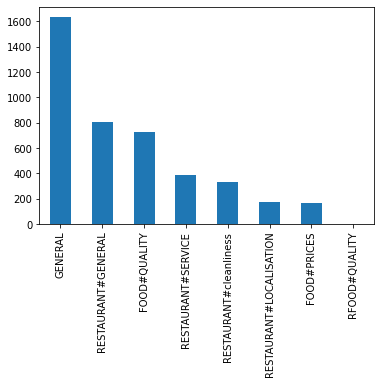

In [14]:
data1.category.value_counts().plot.bar()
data1.category.value_counts()

In [18]:
print(data1[ data1['category'] == 'GENERAL'].size)
print(data1[ data1['category'] == 'RESTAURANT#GENERAL'].size)
print(data1[ data1['category'] == 'FOOD#QUALITY'].size)
print(data1[ data1['category'] == 'FOOD#PRICES'].size)
print(data1[ data1['category'] == 'RESTAURANT#LOCALISATION'].size)
print(data1[ data1['category'] == 'RESTAURANT#SERVICE'].size)
print(data1[ data1['category'] == 'RESTAURANT#cleanliness'].size)

for idx,row in data1.iterrows():
    row[0] = row[0].replace('rt','')
data1.head()

3268
1616
1456
330
348
774
666


,sentence,category
0,نموت علي اكل تونسي محرحر,FOOD#QUALITY
1,شعب هريسه اثبت وجود,GENERAL
2,انا فلسطي بفتخر انو تونس عرب مثلي تحيه لبلد را...,GENERAL
3,والله اطيب واذكي شعب ومضياف وشعب راقي تونس بوا...,GENERAL
4,والله هذا شاب تونسي رجال وكريم وطيب و ابن ناس ...,GENERAL


In [19]:
# saving aspects_encoder_rest encoder
#import pickle
#with open('aspects_encoder_rest.pickle', 'wb') as hand:
#    pickle.dump(data1, hand, protocol=pickle.HIGHEST_PROTOCOL)

In [20]:
    

embed_dim = 128
lstm_out = 512

model1 = Sequential()
model1.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model1.add(SpatialDropout1D(0.4))
model1.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model1.add(Dense(7,activation='softmax'))
model1.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model1.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 210, 128)          256000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 210, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 512)               1312768   
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 3591      
Total params: 1,572,359
Trainable params: 1,572,359
Non-trainable params: 0
_________________________________________________________________
None


In [21]:

Y = pd.get_dummies(dat['category']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(3383, 210) (3383, 7)
(846, 210) (846, 7)


In [11]:

Y = pd.get_dummies(dat['category']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)


(3383, 207) (3383, 7)
(846, 207) (846, 7)


In [ ]:
batch_size = 128
model1.fit(X_train, Y_train, epochs =10, batch_size=batch_size, verbose = 1)

Epoch 1/10
27/27 [==============================] - 3855s 143s/step - loss: 1.7796 - accuracy: 0.3742
Epoch 2/10
27/27 [==============================] - 2807s 104s/step - loss: 1.6229 - accuracy: 0.3816
Epoch 3/10
27/27 [==============================] - 2586s 96s/step - loss: 1.4682 - accuracy: 0.4614
Epoch 4/10
27/27 [==============================] - 1776s 66s/step - loss: 1.2335 - accuracy: 0.5534
Epoch 5/10
27/27 [==============================] - 915s 34s/step - loss: 1.0274 - accuracy: 0.6459
Epoch 6/10
27/27 [==============================] - 865s 32s/step - loss: 0.8644 - accuracy: 0.7009
Epoch 7/10
27/27 [==============================] - 886s 33s/step - loss: 0.7196 - accuracy: 0.7612
Epoch 8/10
23/27 [========================>.....] - ETA: 2:13 - loss: 0.6333 - accuracy: 0.7870

In [ ]:
from sklearn.metrics import accuracy_score,f1_score
Y_pred = model.predict_classes(X_test,batch_size = 128)
df_test = pd.DataFrame({'true': Y_test.tolist(), 'pred':Y_pred})
df_test['true'] = df_test['true'].apply(lambda x: np.argmax(x))
print("confusion matrix",confusion_matrix(df_test.true, df_test.pred))
print(classification_report(df_test.true, df_test.pred))
print("Accuracy of the model : ", accuracy_score(df_test.true, df_test.pred))
print("F1-score: ", f1_score(df_test.true, df_test.pred, average='micro'))

In [21]:
# define the checkpoint
from tensorflow.keras.callbacks import ModelCheckpoint

filepath = "asp.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

# fit the model
model1.fit(X_train, Y_train, epochs=10,batch_size=50, callbacks=callbacks_list)

Epoch 1/10
68/68 [==============================] - ETA: 0s - loss: 0.8009 - accuracy: 0.7221 
Epoch 00001: loss improved from inf to 0.80091, saving model to asp.h5
68/68 [==============================] - 1971s 29s/step - loss: 0.8009 - accuracy: 0.7221
Epoch 2/10
68/68 [==============================] - ETA: 0s - loss: 0.6533 - accuracy: 0.7748 
Epoch 00002: loss improved from 0.80091 to 0.65327, saving model to asp.h5
68/68 [==============================] - 1970s 29s/step - loss: 0.6533 - accuracy: 0.7748
Epoch 3/10
68/68 [==============================] - ETA: 0s - loss: 0.5260 - accuracy: 0.8158 
Epoch 00003: loss improved from 0.65327 to 0.52596, saving model to asp.h5
68/68 [==============================] - 1972s 29s/step - loss: 0.5260 - accuracy: 0.8158
Epoch 4/10
68/68 [==============================] - ETA: 0s - loss: 0.4727 - accuracy: 0.8380 
Epoch 00004: loss improved from 0.52596 to 0.47272, saving model to asp.h5
68/68 [==============================] - 1982s 29s/ste

In [ ]:
from tensorflow.keras.models import  load_model
from numpy.testing import assert_allclose

# load the model
new_model1 = load_model("asp.h5")
assert_allclose(model1.predict(X_train),
                new_model1.predict(X_train),
                1e-5)

# fit the model
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
new_model1.fit(X_train, Y_train, epochs=10, batch_size=50, callbacks=callbacks_list)

Here we train the Network. We should run much more than 7 epoch, but I would have to wait forever for kaggle, so it is 7 for now.

In [ ]:
model1.load_weights("aspect.h5")

Extracting a validation set, and measuring score and accuracy.

In [29]:
new_model1 = load_model("C:/Users/DELL/Desktop/memoire de master/myproject/asp_el.h5")
Y_pred1 = new_model1.predict_classes(X_test,batch_size = 128)

In [15]:
df_test = pd.DataFrame({'true': Y_test.tolist(), 'pred':Y_pred1})
df_test['true'] = df_test['true'].apply(lambda x: np.argmax(x))
print("confusion matrix",confusion_matrix(df_test.true, df_test.pred))
print(classification_report(df_test.true, df_test.pred))

confusion matrix [[ 12   8   4   2   0   1   3]
 [  1  37  16  21   2   5   9]
 [  2  20 248  52   1  20   8]
 [  2  27  59  89   1   8   6]
 [  0   3  15   5  13   0   2]
 [  0   3  21  12   0  39   5]
 [  1   7   8   4   0   1  43]]
              precision    recall  f1-score   support

           0       0.67      0.40      0.50        30
           1       0.35      0.41      0.38        91
           2       0.67      0.71      0.69       351
           3       0.48      0.46      0.47       192
           4       0.76      0.34      0.47        38
           5       0.53      0.49      0.51        80
           6       0.57      0.67      0.61        64

    accuracy                           0.57       846
   macro avg       0.58      0.50      0.52       846
weighted avg       0.58      0.57      0.57       846



In [30]:
txt = ['صحفية هايلة يعطي صحة']
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(txt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=29, dtype='int32', value=0)
print(txt)
aspect = new_model1.predict(twt,batch_size=1,verbose = 2)[0]

np.argmax(aspect)

['صحفية هايلة يعطي صحة']
1/1 - 0s


5

In [34]:
twt = ['صحفية هايلة يعطي صحة']
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=29, dtype='int32', value=0)
print(twt)
sentiment = new_model1.predict(twt,batch_size=1,verbose = 2)[0]

aspect = new_model.predict(twt,batch_size=1,verbose = 2)[0]

if(np.argmax(aspect) == 0):
    print("negative")
elif (np.argmax(aspect) == 2):
    print("positive")
elif (np.argmax(aspect) == 1):
    print("neutre")






if(np.argmax(sentiment) == 2):
    print("PRESIDENT")
elif (np.argmax(sentiment) == 3):
    print("ELECTION")
elif (np.argmax(sentiment) == 0):
    print("CANDIDAT")
elif (np.argmax(sentiment) == 1):
    print("DEBAT")
elif (np.argmax(sentiment) == 4):
    print("GENERAL")
elif (np.argmax(sentiment) == 6):
    print("DIALOGUE")
elif (np.argmax(sentiment) == 6):
    print("JOURNALIST")
elif (np.argmax(sentiment) == 7):
    print("PROGRAM")
elif (np.argmax(sentiment) == 8):
    print("PEOPLE")

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0 296 611 327]]
1/1 - 0s
1/1 - 0s
neutre
DIALOGUE


In [17]:
txt = ['صحفية هايلة يعطي صحة']
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(txt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=29, dtype='int32', value=0)
print(txt)
sentiment = new_model.predict(twt,batch_size=1,verbose = 2)[0]
aspect = new_model1.predict(twt,batch_size=1,verbose = 2)[0]

if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")
elif (np.argmax(sentiment) == 2):
    print("neutre")
if(np.argmax(aspect) == 2):
    print("FOOD#QUALITY")
elif (np.argmax(aspect) == 0):
    print("FOOD#PRICES")
elif (np.argmax(aspect) == 3):
    print("GENERAL")
elif (np.argmax(aspect) == 1):
    print("RESTAURANT#GENERAL")
elif (np.argmax(aspect) == 4):
    print("RESTAURANT#LOCALISATION")
elif (np.argmax(aspect) == 5):
    print("RESTAURANT#SERVICE")
elif (np.argmax(aspect) == 6):
    print("RESTAURANT#cleanliness")

['بعد ثوره اسوام خياليه']
1/1 - 0s
1/1 - 0s
negative
FOOD#PRICES


In [20]:
txt = ['نموت علي اكل تونسي محرحر']
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(txt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=29, dtype='int32', value=0)
print(txt)
sentiment = new_model.predict(twt,batch_size=1,verbose = 2)[0]
aspect = new_model1.predict(twt,batch_size=1,verbose = 2)[0]

if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")
elif (np.argmax(sentiment) == 2):
    print("neutre")
if(np.argmax(aspect) == 1):
    print("FOOD#QUALITY")
elif (np.argmax(aspect) == 6):
    print("FOOD#PRICES")
elif (np.argmax(aspect) == 0):
    print("GENERAL")
elif (np.argmax(aspect) == 1):
    print("RESTAURANT#GENERAL")
elif (np.argmax(aspect) == 4):
    print("RESTAURANT#LOCALISATION")
elif (np.argmax(aspect) == 5):
    print("RESTAURANT#SERVICE")
elif (np.argmax(aspect) == 2):
    print("RESTAURANT#cleanliness")

['نموت علي اكل تونسي محرحر']
1/1 - 0s
1/1 - 0s
positive
FOOD#QUALITY


In [21]:
txt = ['مضر']
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(txt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=29, dtype='int32', value=0)
print(txt)
sentiment = new_model.predict(twt,batch_size=1,verbose = 2)[0]
aspect = new_model1.predict(twt,batch_size=1,verbose = 2)[0]

if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")
elif (np.argmax(sentiment) == 2):
    print("neutre")
    
if(np.argmax(aspect) == 3):
    print("FOOD#QUALITY")
elif (np.argmax(aspect) == 0):
    print("FOOD#PRICES")
elif (np.argmax(aspect) == 0):
    print("GENERAL")
elif (np.argmax(aspect) == 1):
    print("RESTAURANT#GENERAL")
elif (np.argmax(aspect) == 4):
    print("RESTAURANT#LOCALISATION")
elif (np.argmax(aspect) == 5):
    print("RESTAURANT#SERVICE")
elif (np.argmax(aspect) == 6):
    print("RESTAURANT#cleanliness")

['مضر']
1/1 - 0s
1/1 - 0s
negative
RESTAURANT#cleanliness
